In [35]:
import pandas as pd
import seaborn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from prettytable import PrettyTable
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing


In [36]:
data = pd.read_csv('C:/Users/prana/Desktop/SAI/diabetes.csv')
data.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [37]:
data.corr()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
AGE,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
SEX,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
BMI,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
BP,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
S1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
S2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
S3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
S4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
S5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
S6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


<AxesSubplot:>

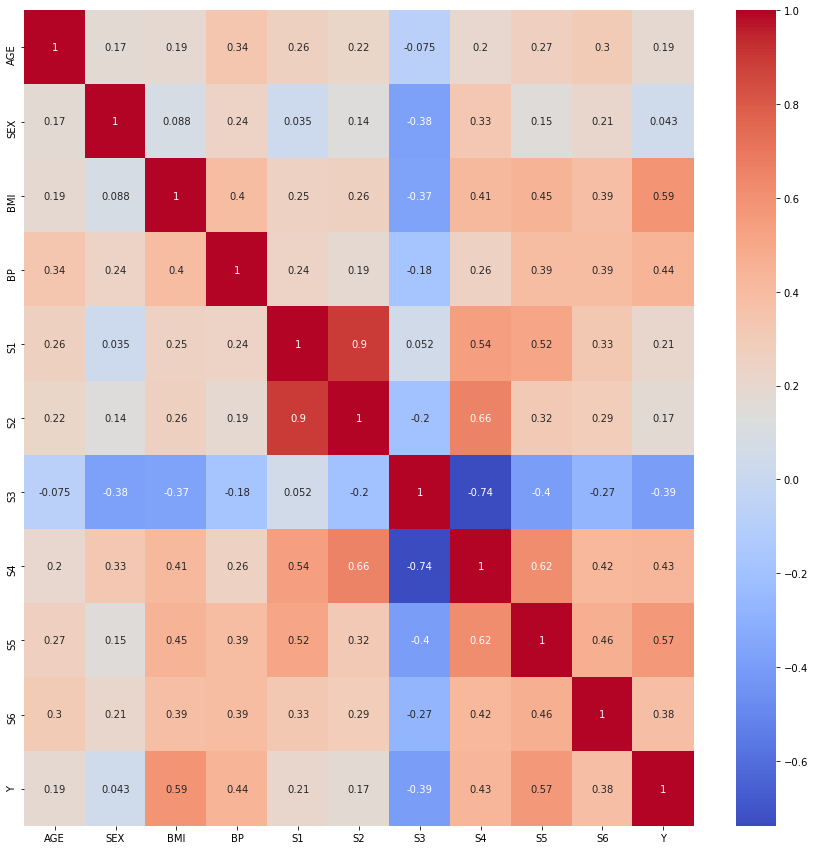

In [38]:
plt.figure(figsize=(15 ,15))
seaborn.heatmap(data.corr(), annot=True, cmap = "coolwarm")

In [78]:
x = data['BMI']
y = data['Y']

In [79]:
# normalizer = preprocessing.Normalizer()
# normalized_X = normalizer.fit_transform(x)

In [279]:
# X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2)
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state = 9)
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)

In [280]:
LR = LinearRegression(normalize=False)

In [281]:
LR.fit(X_train, Y_train)

LinearRegression()

In [282]:
LR.score(X_test, Y_test)

0.5530661632210778

In [283]:
y_predict = LR.predict(X_test)

In [284]:
print(LR.coef_)

[9.63490545]


In [285]:
print(LR.intercept_)

-101.02002167428608


In [286]:
mean_squared_error(Y_test, y_predict)

2432.2026549677416

In [287]:
mean_squared_error(Y_test, y_predict, squared=False)

49.31736666700425

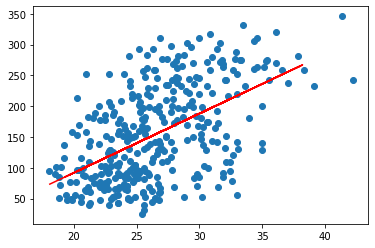

In [288]:
plt.scatter(X_train, Y_train)
plt.plot(X_test,y_predict, color='red')
plt.show()